In [1]:
from IPython.display import Image

# Overview of a Multiple-Risk Epidemic model
### Matthew J. Baker
### Hunter College and the Graduate Center, CUNY

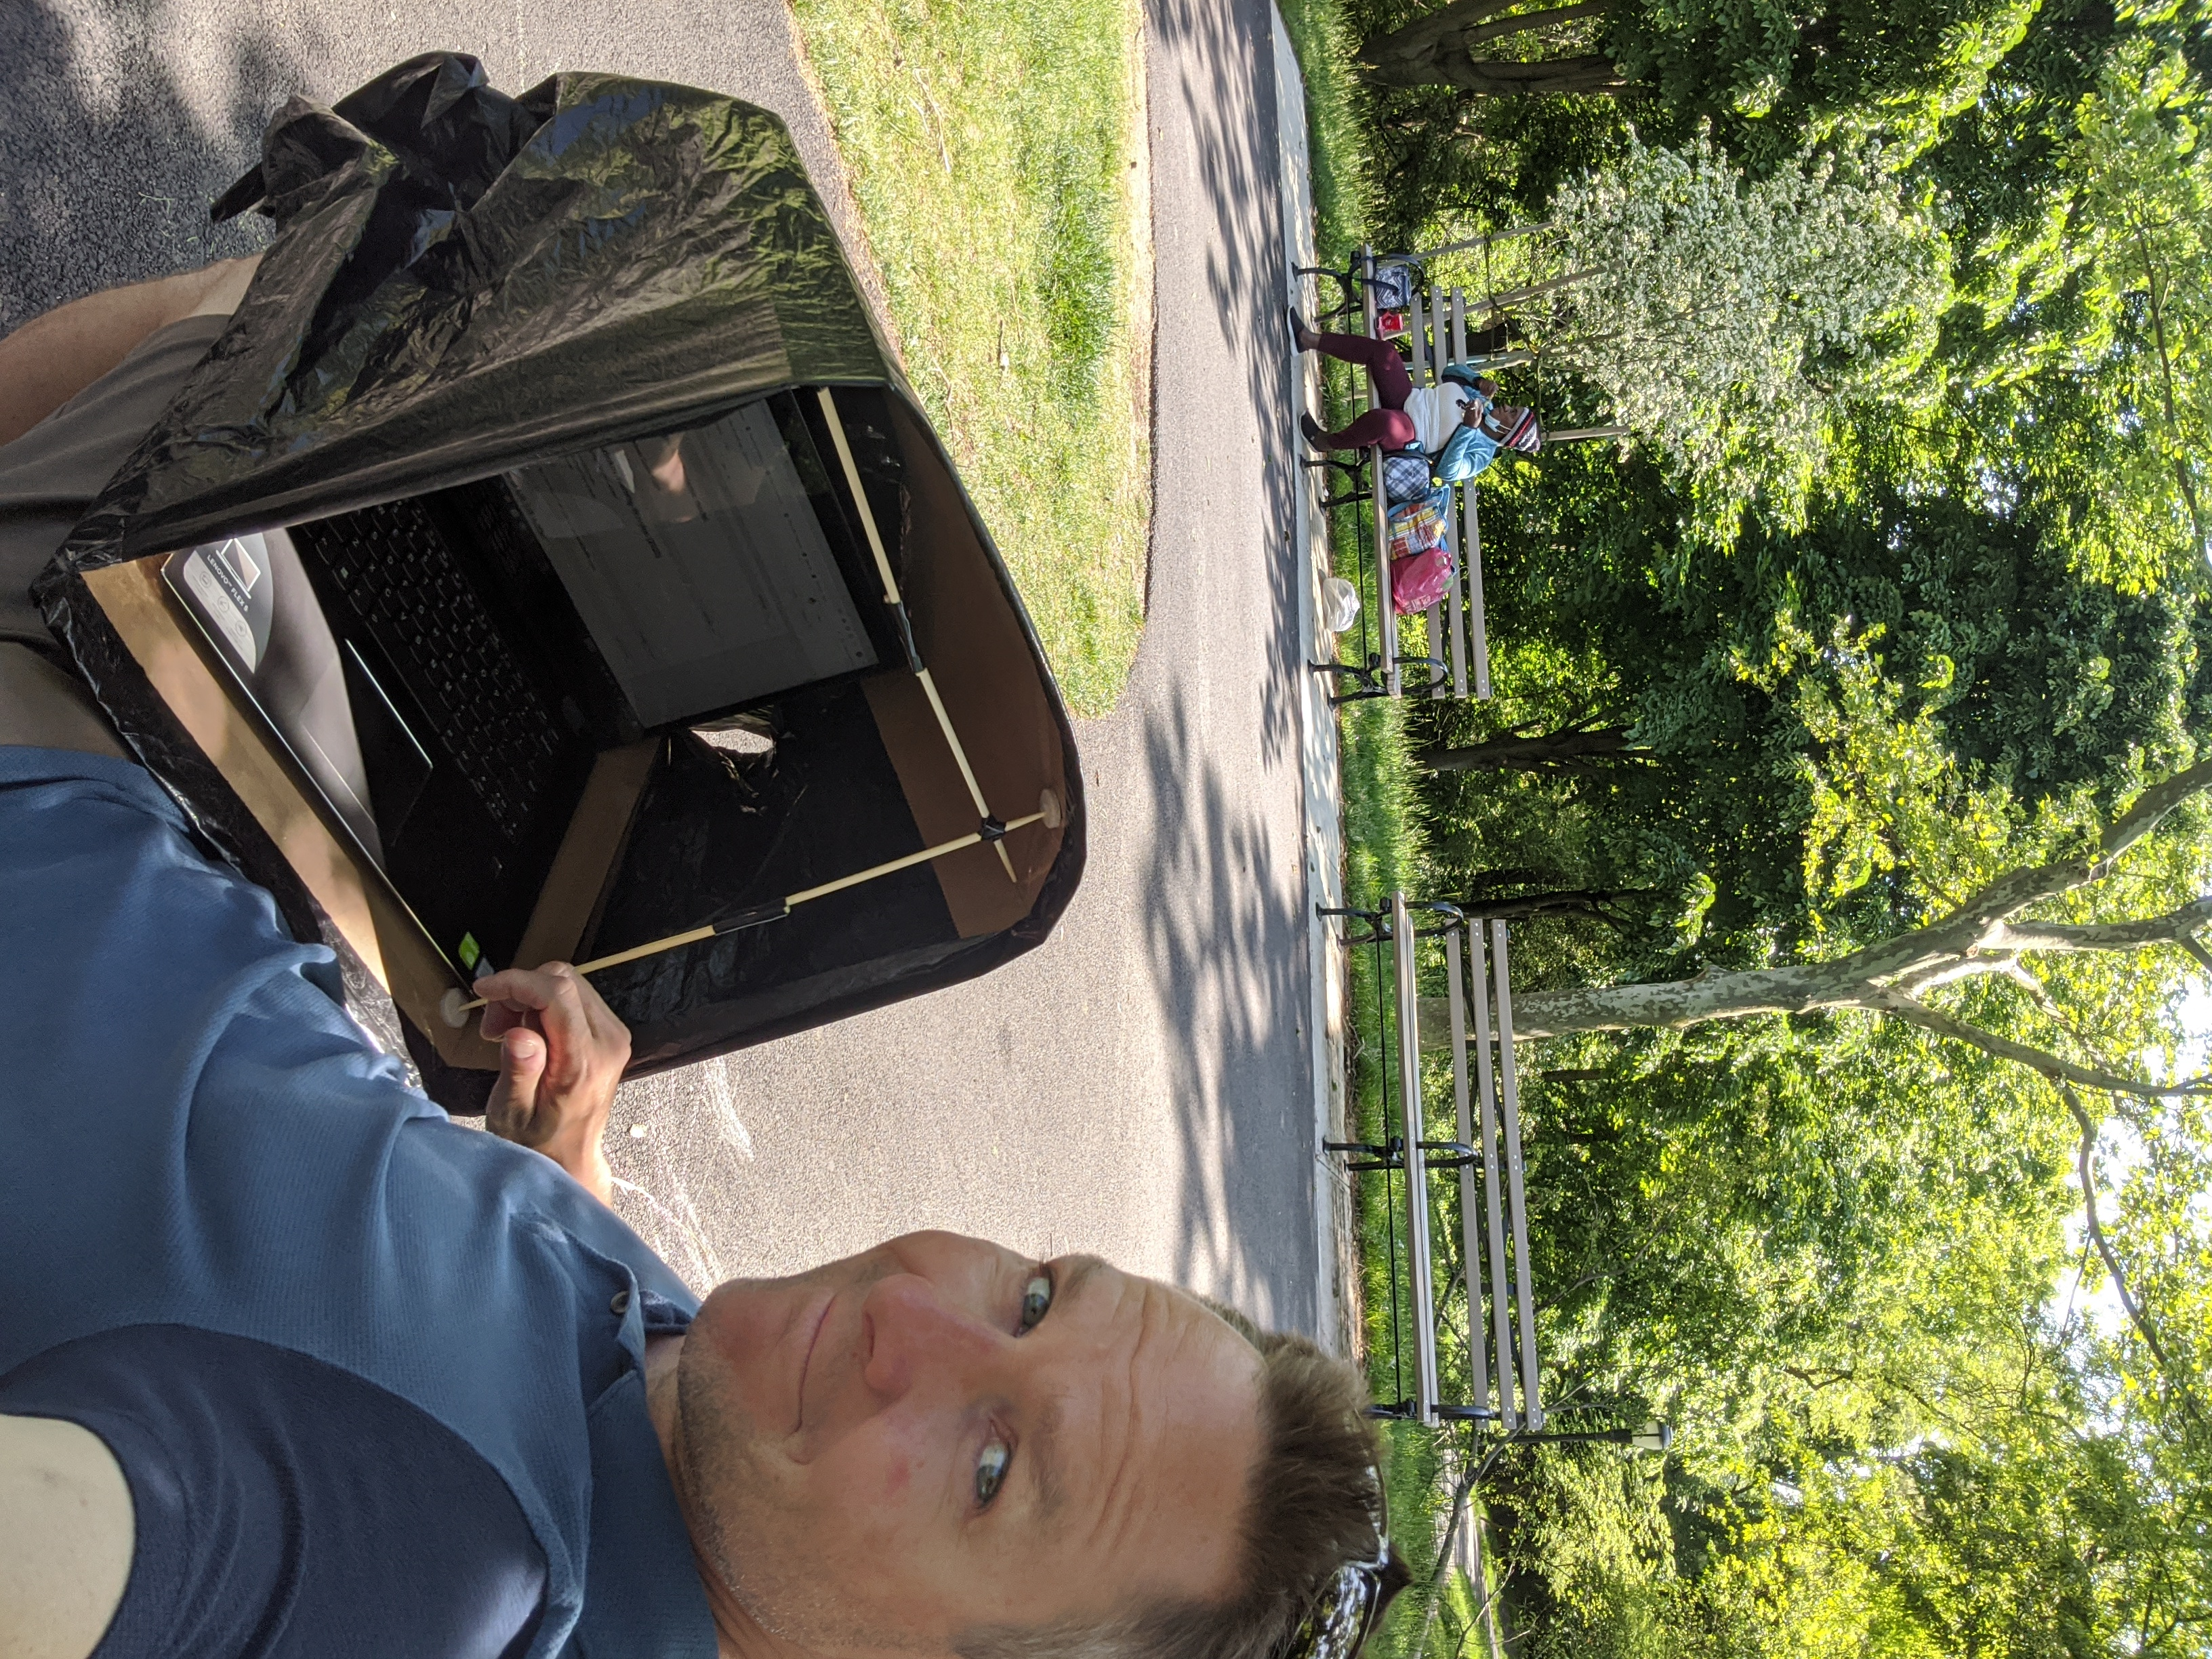

In [2]:
Image('C:\\users\\matth\\documents\\github\\epidemics\\TentPhoto.jpg', width=500, height=300)

# Acemoglu-Chernozhukov-Werning-Winston (2020)
- "A Multi-Risk SIR Model with Optimally Targeted Lockdown" 
- NBER working paper
- A Susceptible, Infected, Recovered (SIR) model. 
  - Multi-Risk: age classes with different risks of death.
  - Otherwise a Standard SIR model


Obvious Acronym is **MR-SIR**, what about **ACheWW**...

# Additional features of MR-SIR model
- Explicit inclusion of employment, wages, and the statistical value of a human life.
- Multiple policy instruments for addressing the epidemic.
- Interrelation between death rates and hospitalization.

# Modeling Features:
  - Policy instruments (age group specific):
    - testing, screening, and isolation
    - antibody/recovered release 
    - age-class specific lockdowns.
  - Matching function that nests the standard product $m=si$ form.
  - Flexible age-group-specific interactions.


# Analysis
- Optimal control problem over choice of lockdown structure and severity
- Policy with and without the (possible) occurrence of a vaccine

# Conclusions

- Optimal policy is typically a lockdown that recedes over time
- Targeted lockdowns are superior to general ones:
  - Replicate benefits
  - At a fraction of the societal costs
- Testing and isolation can also accomplish the objective of slowing the spread 

# In this presentation...
- Sidestep the control problem
- Ignore possibility of vaccine discovery
- Objectives: 
  - develop a feel for tradeoffs of different policies.
  - suggest some policy issues the model could be used to analyze.
- This follows the authors' app


# Preview of some results

- testing with isolation can accomplish what a lockdown can
- Hard to justify a total, lengthy lockdown - the lockdown should recede even after a short period.
- Sudden removal of a lockdown is a bad idea, if the lockdown was timely
- Antibody testing is a win-win.

# Model Mechanics

Three different age classes: $j=y,m,o$, where:
$$
S_j(t)+I_j(t)+R_j(t)+D_j(t)=N_j
$$
$$
\sum N_j = 1 
$$
so, $N_j$ is the population frequency of demographic $j$. 


## Matching function with constant returns to scale (not really used)

While they introduce it in the paper, it seems as though it works in the opposite fashion as one would expect.

$$
M_j = \left(\sum_k\beta_{jk}\left[(S_k+\eta_kI_k+(1-\kappa_k)R_k)(1-\theta_jL_k)+\kappa_kR_k\right]\right)^{\alpha-2}
$$

## Infection Dynamics

Base Dynamics that are most important:

$$
\dot{I}_j = M_j(S,I,R,L)(1-\theta_jL_j)S_j\sum_k\beta_{jk}(1-\theta_kL_k)I_k - \gamma_jI_j
$$
Change in infections depend on policy parameters $L_j \in [0,1]$, "leakage" $\theta_j \in [0,1]$, and "social interaction rate" $\beta_{jk}$ between different age classes. $M_j$ can correct quadraticness of the function.

Description of parameters:

$\eta$ is the fraction of infected individuals of age $k$ that are capable of infecting others. $\theta_k$ is the degree of societal lockdown. While $L_k$ is also included as a lockdown variable. I'm going to program this so we have a maximum lockdown and then a "taper off." 

Anyways, here is a table:

| Parameter   |                    Description                                    | Continuous Value | Discretization |
|-----------  |     :--------------------:                                        | :-----: |     |
|$\theta_k$   | Policy compliance rate   |    .75     |   .5 $(1-e^{-\theta_k})$|
|$\rho_{jk}$  | The natural rate at which group $j$ and $k$ interact.             |    .2     |   |
|$\iota_k$    | ICU care rate among group $j$                              |  See below...depends on death rate.  |   |
|$\gamma_k$   | Recovery rate of non-hospitalized cases.                          |    1/18=.0555     |    |
|$\underline{\delta}^d_k$ | Floor death rate of group $k$ hosp. cases. ACWW assume $\delta^r_k = \gamma_k-\delta^d_k$. | (.001, .01, .06)*1/18   |    |
|$\phi_k$     | Detection rate among ICU cases, due to testing.   |  0  |
|$\tau_k$     | Detection rate among non-ICU cases. |   0  |
|$\kappa_k$   | Cases that have recovered that can return to work. | 1   |

# Hospitalizations and Death Rates
- Source of societal costs of infection in the model
- Hospitalization needs are _proportional to death rates_ - proxy of severity. Total hospitalizations:
$$
H(t) = \sigma \sum \underline{\delta}_j^d I_j(t)
$$
- Death rates are increasing in hospitalizations
$$
\delta_j^d(t) = \underline{\delta}_j^d(1+\lambda H(t))
$$

The above can be written:

$$
\delta_j^d(t) = \underline{\delta}_j^d(1+\hat{\lambda}\sum \underline{\delta}_k^d I_k(t))
$$

where now $\hat{\lambda}=\lambda\sigma$. They set everything so that if there were a %30 infection rate, mortality rates are 5 times baseline. Since population fractions are .53, .25, and .21, we multiply by .3 to get .159, .075, and .025 In our equation above. So, we can compute the thing on the right-hand side to be:

Then, we have the equations:

$$
5(.0000555) = .0000555(1 + \hat{\lambda}\sigma .0001336995
$$
$$
5(.000555) = .000555(1+\hat{\lambda}\sigma .0001336995
$$
$$
5(.00333) = .00333(1+\hat{\lambda}\sigma .0001336995
$$

Playing around with these pins down values for $\lambda$ and $\sigma$, but not all that precisely.

# Infection dynamics

I discretize the ACheWW model into a discrete-time model where the time unit is one day. The three age classes interact as follows:

$$
i_{1t+1} = i_{1t}(1-\iota_{1}(\delta_1^r+(1-\delta_1^r)\psi_1(h_t))-(1-\iota_1)\gamma_1) + \\ m_1(1-\theta_1l_{1t})s_{1t}\sum_{k}(\beta_{1k}(1-\theta_{k}l_{kt})i_{kt}
$$
$$
i_{2t+1} = i_{2t}(1-\iota_{2}(\delta_2^r+(1-\delta_2^r)\psi_2(h_t))-(1-\iota_2)\gamma_2) + \\ m_2(1-\theta_2l_{2t})s_{2t}\sum_{k}(\beta_{2k}(1-\theta_{k}l_{kt})i_{kt}
$$
$$
i_{3t+1} = i_{3t}(1-\iota_{3}(\delta_3^r+(1-\delta_2^r)\psi_3(h_t))-(1-\iota_3)\gamma_3) + \\ m_3(1-\theta_3l_{3t})s_{3t}\sum_{k}(\beta_{3k}(1-\theta_{k}l_{kt})i_{kt}
$$

# Dynamics of susceptibles

Susceptibles obey:

$$
s_{1t+1} = s_{1t} - m_1(1-\theta_1l_{1t})s_{1t}\sum_{k}(\beta_{1k}(1-\theta_{k}l_{kt})i_{kt}
$$
$$
s_{2t+1} = s_{2t} - m_2(1-\theta_2l_{2t})s_{2t}\sum_{k}(\beta_{2k}(1-\theta_{k}l_{kt})i_{kt}
$$
$$
s_{3t+1} = s_{3t} - m_3(1-\theta_3l_{3t})s_{3t}\sum_{k}(\beta_{3k}(1-\theta_{k}l_{kt})i_{kt}
$$


Parameters obey the following rules:

$$
\beta_{jk}=\rho_{jk}(1-\iota_k\phi_k-(1-\iota_k)\tau_k)
$$

$$
\eta_k = 1-\iota_k\phi_k - (1-\iota_k)\tau_k
$$

So, social interactions can be influenced by testing and isolation.

So, in the above, we have a lockdown parameter $l_{jt}$ and a leakage parameter $\theta_j$, which describes the degree to which a lockdown $\in [0,1]$ slows people down. As the lockdown parameter and the $\theta_j$ parameter interact, we get the above results. 

Deaths:


$$
d_{1t+1} = d_{1t} + \delta_{1t}^di_{1t}
$$
$$
d_{2t+1} = d_{2t} + \delta_{2t}^di_{2t}
$$
$$
d_{3t+1} = d_{3t} + \delta_{3t}^di_{3t}
$$

Recoveries:

$$
r_{1t+1} = r_{1t} + \delta_{1t}^ri_{1t}
$$
$$
r_{2t+1} = r_{2t} + \delta_{2t}^ri_{2t}
$$
$$
r_{3t+1} = r_{3t} + \delta_{3t}^ri_{3t}
$$

How to program? Let's start with a base version of the model that does not have a "lockdown" policy. So, here we are omitting the variables $l_i$. I still retain the $\theta$ variables because we can see how this works as we move along.


# Employment

The expression ACheWW use is:

$$
e_{jt} = (1-l_{jt})\left(s_{jt} + (1-\iota_j\phi_j-(1-\iota_j)\tau_j)i_{jt}+(1-\kappa_j)r_{jt}\right) + \kappa_jr_{jt}
$$

So, employment is basically those that aren't locked down that are available for work. The available population for work includes all the susceptibles and the certified recovered group. Employable infecteds are everyone but those that are detected and removed from the population. I'm going to depart from this and think about unemployment. 

It would be:

- In the labor force
- Not detected recovered
- Not essential
- Locked down
- susceptible
- infected, not detected
- recovered, not detected. 


# Unemployment

While ACheWW use a formulation of employment using lost wages, I instead opt for just a measure of unemployment:


$$
u_{jt} = lf_j(1-es_j)l_{jt}\left(s_{jt}+i_{jt}(1-\iota_j\phi_j-(1-\iota_j)\tau_j)+(1-\kappa_jr_{jt}\right)
$$

This assumes that sick people can still work so long as they aren't deceased or isolated.

Now, note that if we divide the number of unemployed by the labor force participation rate, we just get the above, so we don't really need this. Thus, we can drop labor force participation from the above. 

Moreover, we could also add in a stickiness factor. Unemployment here isn't really interacting with anything else, so we might allow it to have a residual effect or to only slowly disipate. Bells and whistles for now. 

We might also just fold the "essential workers" into the policy parameter, so the $l_{jt}$ term would include essential workers. But then, we could think about the fraction of people that can work from home. Hence, we have the unemployment rates as:

$$
u_{jt} = (1-wf_j)(1-l_{jt})\left(s_{jt}+i_{jt}(1-\iota_j\phi_j-(1-\iota_j)\tau_j)+(1-\kappa_j)r_{jt}\right)
$$

and the collateral damage unemployment as:

$$
u_{jt} = (1-wf_j)(1-l_{jt})\left(s_{jt}+(1-\kappa_j)r_{jt}\right)
$$

Now, really what we would want is a daily unemployment rate - that is, we would want to know what fraction of people who normally would have jobs lose them in a pandemic? This clearly depends upon a couple of things like:

- labor force participation of age groups
- fraction that can work from home productively during the pandemic
- fraction that are essential workers. 

Here is a breakdown of some of the numbers that we might want to think about:

|  Statistic                | 20-49 | 50-64 | 65 +  |
| :---------------          |:-----:|:-----:|:-----:|
| Labor force participation |   .80 |   .72 |   .15 |
| Work from home completely |   .10 |  .20  |   .05 |
| Percent essential         |   .34 |  .34  |   .34 |
| Employment sensitive      |   .45 |  .38  |   .10 |

So, of these age groups we have an employment-susceptible population which we will characterize using the lockdown parameter to some degree. Note that an imperfect lockdown parameter means that there is employment leakage which is kind of a good thing, in that it measures the ability for people to "work around" employment restrictions. 

We then take the number of people working, 80 of every 100 20-49 year-olds. 44 % of these people can't lose their jobs. So, the employment susceptible are about 56% of the 80, or about 45%. For the 50-64 age group, there are .72 in the labor force. 54 % of these people can't lose their jobs, so 46% can. Finally, of .15, .39 can't lose their jobs, so we have: .095 susceptible.



# Optimal policies approximated

To approximate the optimal policies derived by the authors, consider policies where:
- A strict lockdown tapers (depreciates at some daily rate) over time
- Comparison of targeted versus untargeted lockdown
- Question of how testing, isolation, and release impact things.

# Some Code and Models

In [3]:
import os
os.chdir('..\\code')
from achw_code import achewwmodel, compare_models_detailed, display_aggs

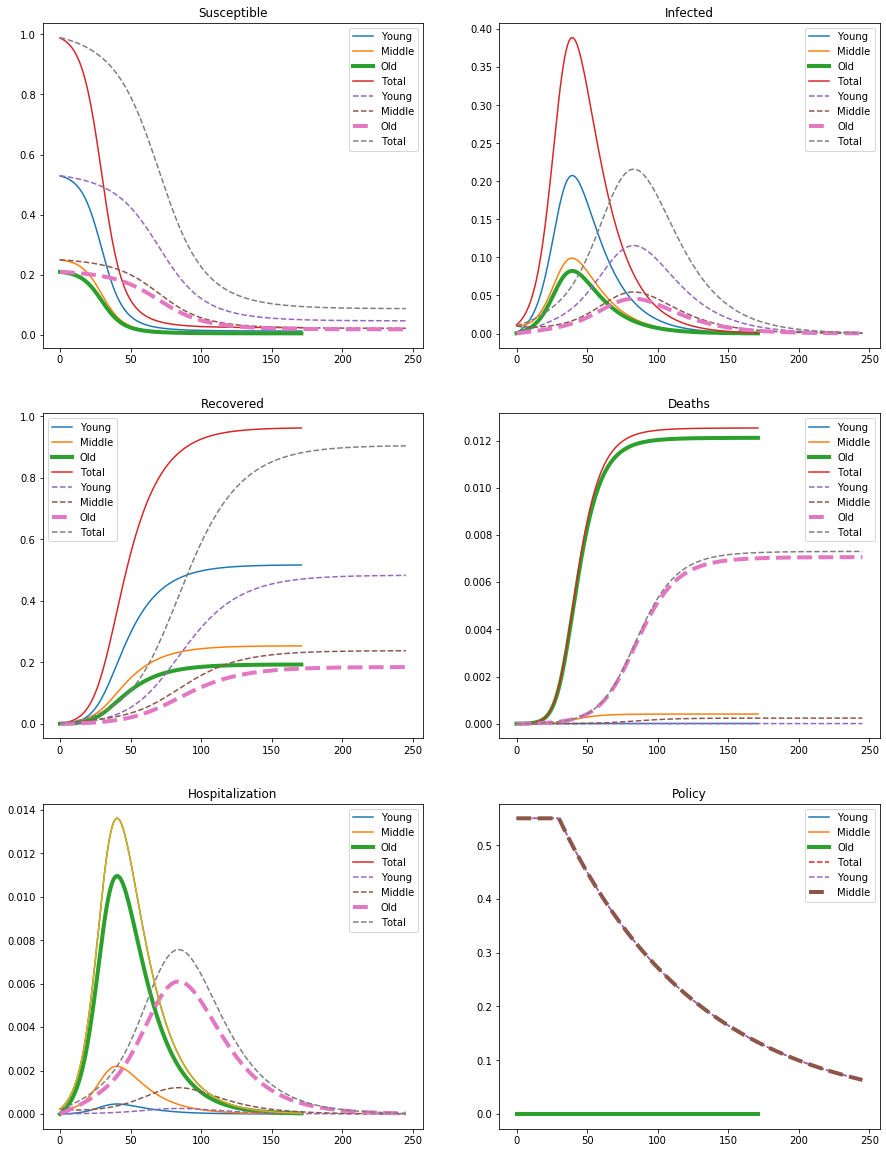

In [4]:
baseline = achewwmodel() #No lockdown benchmark - solid lines (totals)
lockdown = achewwmodel(L=[.55, .55, .55], maxlock=30, taper=[.01, .01, .01])
compare_models_detailed(baseline, lockdown)

display_aggs(baseline), display_aggs(lockdown)

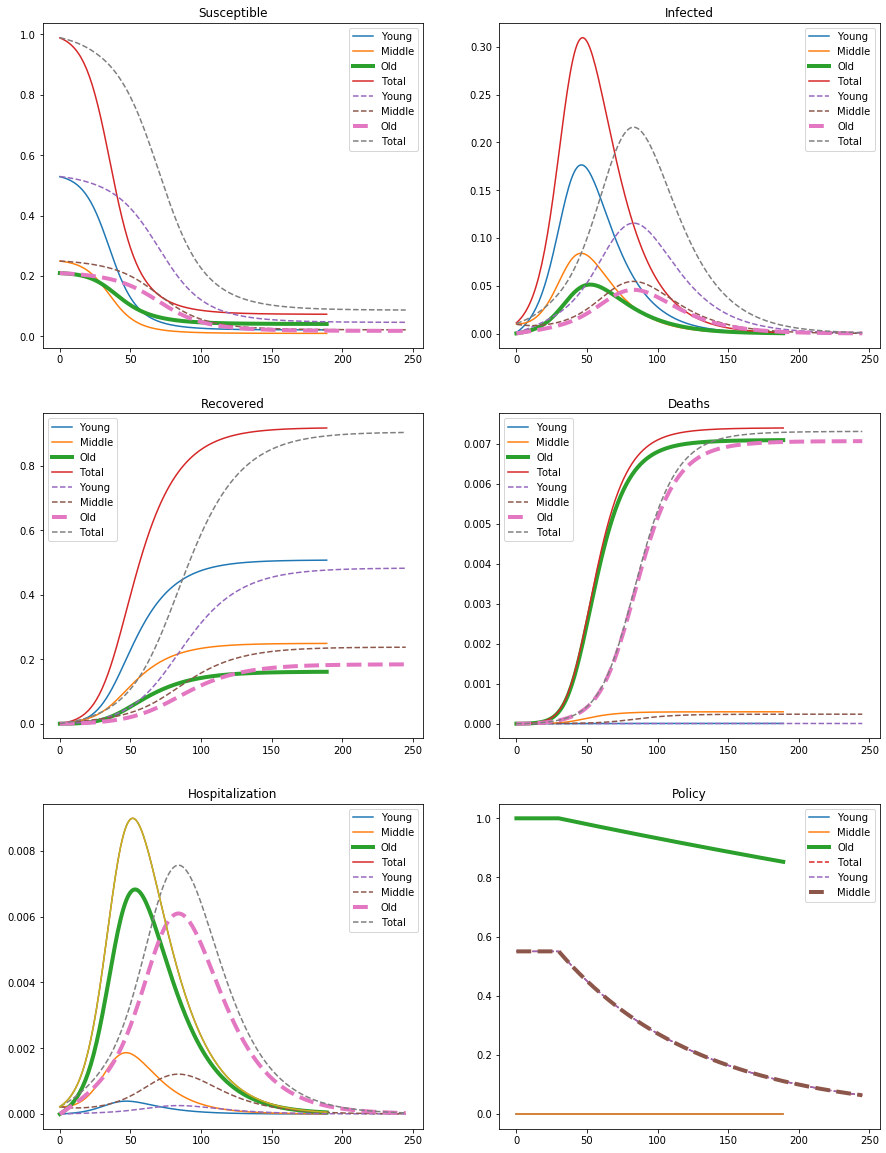

In [5]:
targeted_lockdown = achewwmodel(L=[0, 0, 1], taper = [0, 0, .001], maxlock=30)
sweeping_lockdown = achewwmodel(L=[.55, .55, .55], taper = [.01, .01, .01], maxlock=30)
compare_models_detailed(targeted_lockdown, sweeping_lockdown)

In [6]:
display_aggs(targeted_lockdown)
display_aggs(sweeping_lockdown)

Unemployment days lost:   1.665310848662604
Total deaths:             0.007389159945900395
Total epidemic days:      190
Total recovered:          0.9179507399942519
Maximum infection at  47  with value  0.3096090887071856
Maximum hospitalizations at  52  with value  0.008992271317812382
Unemployment days lost:   25.114330399835318
Total deaths:             0.007302572323988995
Total epidemic days:      246
Total recovered:          0.904085581013212
Maximum infection at  83  with value  0.21594057798814772
Maximum hospitalizations at  84  with value  0.00756730832012119


# Testing and isolation

Contrast a model with these things and a baseline...

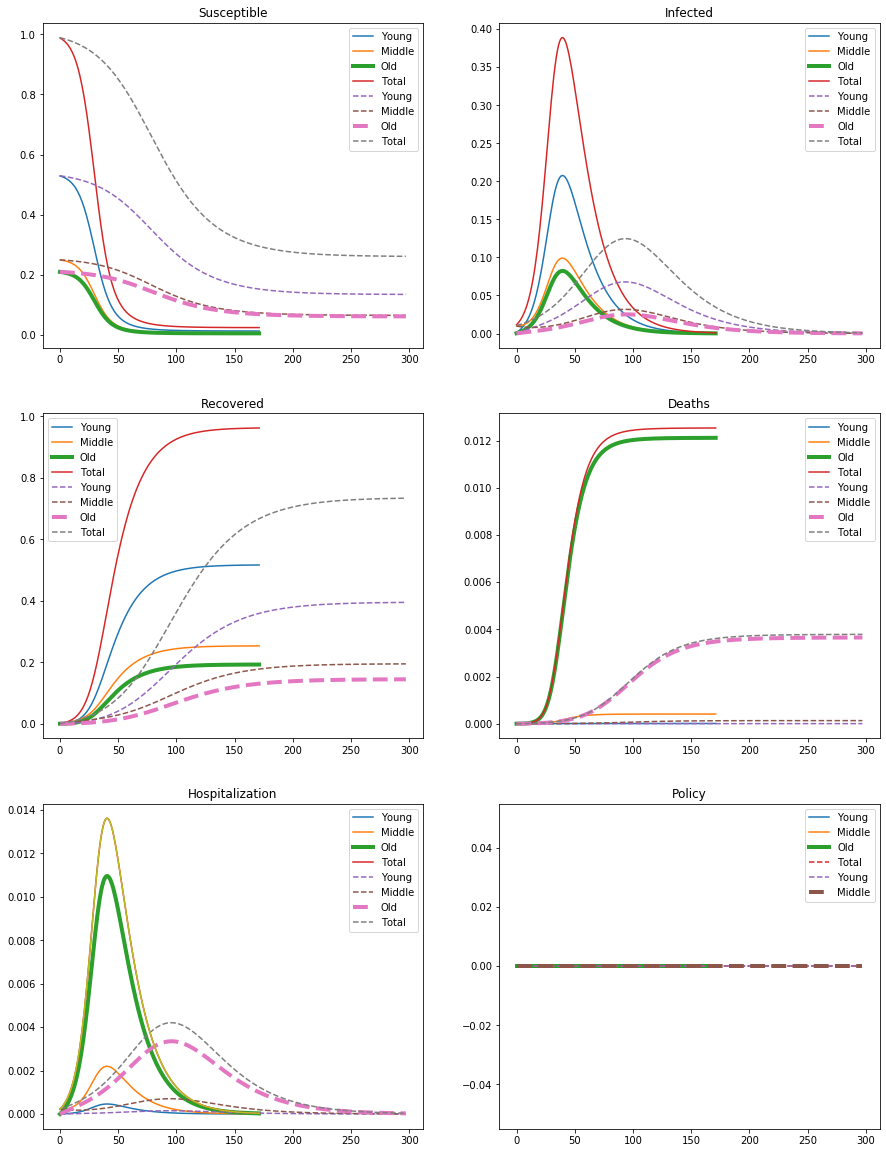

In [7]:
baseline       = achewwmodel()
testiso = achewwmodel(phi=[.9, .9, .9], tau=[.5, .5, .5])
compare_models_detailed(baseline, testiso)

In [8]:
display_aggs(baseline)
display_aggs(testiso)

Unemployment days lost:   0.0
Total deaths:             0.012534303172226759
Total epidemic days:      172
Total recovered:          0.962151619701018
Maximum infection at  39  with value  0.3887596156238392
Maximum hospitalizations at  40  with value  0.013611722919678536
Unemployment days lost:   0.0
Total deaths:             0.003786387838157646
Total epidemic days:      298
Total recovered:          0.7337447981051246
Maximum infection at  94  with value  0.12466502438470028
Maximum hospitalizations at  96  with value  0.004203647426277753


# Policy Delay

What happens if, say, a lockdown starts but it is delayed? Anecdotal evidence (my own) suggests that the policy came late in the game... 

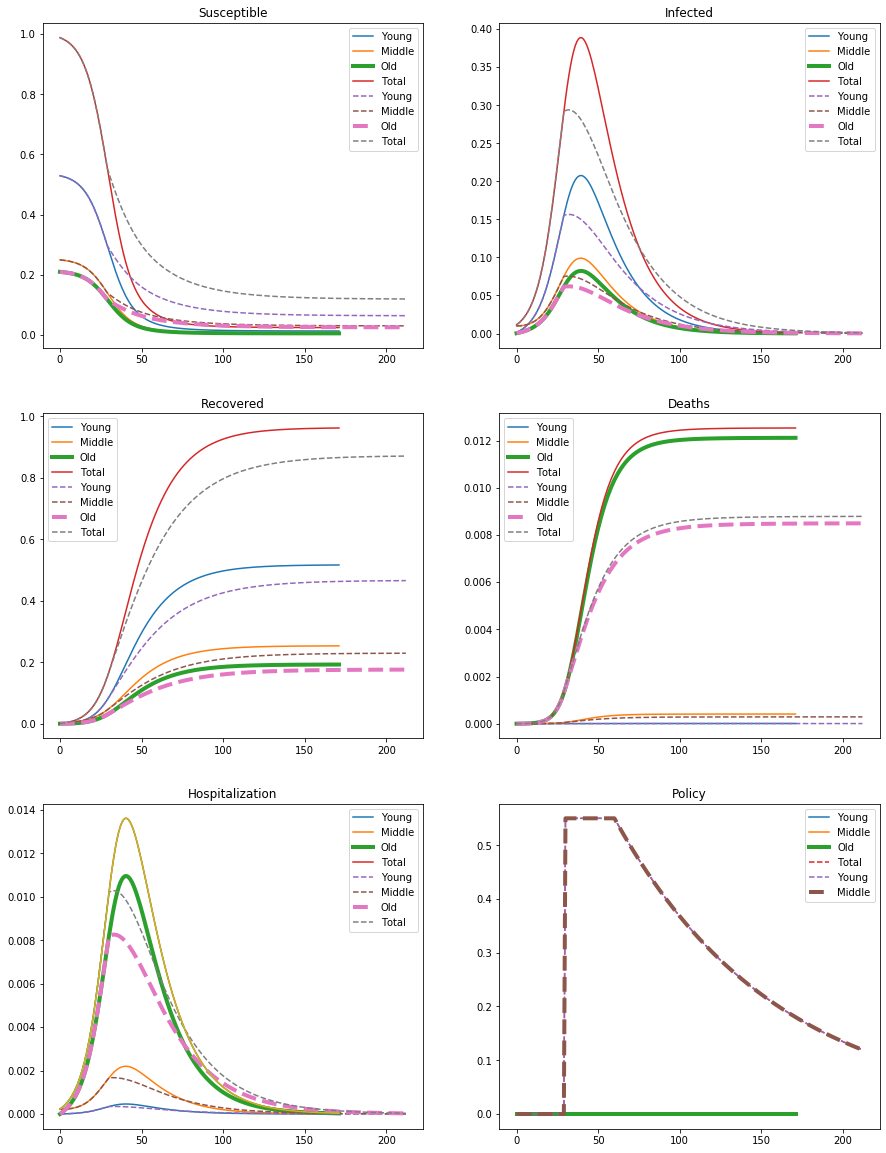

In [9]:
baseline = achewwmodel(L=[.55, .55, .55], maxlock=30, taper=[.01, .01, .01])
baseline = achewwmodel()
compare = achewwmodel(L=[.55, .55, .55], maxlock=30, taper=[.01, .01, .01], delay=30)
compare_models_detailed(baseline, compare)

# Some Takeaways
- **The results are tentative!** Calibration details matter
- Testing and isolation seem to be very powerful tools
- Targeted lockdowns are "almost" as good as complete lockdowns, and at a fraction of the cost
- All policies _slow the spread_ they don't stop it.

# Research possibilities
### Model could be extended in many ways
- Allow for further demographics - racial composition of the population
- Time-varying social interactions (people get tired of the lockdown)
###  Authors' app: https://mr-sir.herokuapp.com/main
### Github site: https://github.com/hunterecon2/epidemics

# Thanks!